# Linear and Logistic Regression Laboratory

## Linear Regression

We will use the datatset available at this URL:

https://www.kaggle.com/datasets/yasserh/advertising-sales-dataset

Let us load the dataset:

In [3]:
import pandas as pd
advertising=pd.read_csv('Advertising Budget and Sales.csv')
advertising=advertising.rename(columns={
    'Unnamed: 0':'Index',
    'TV Ad Budget ($)': 'tv',
    'Radio Ad Budget ($)': 'radio',
    'Newspaper Ad Budget ($)': 'newspaper',
    'Sales ($)': 'sales'
    })
advertising.set_index('Index')

,tv,radio,newspaper,sales
Index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   tv         200 non-null    float64
 2   radio      200 non-null    float64
 3   newspaper  200 non-null    float64
 4   sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


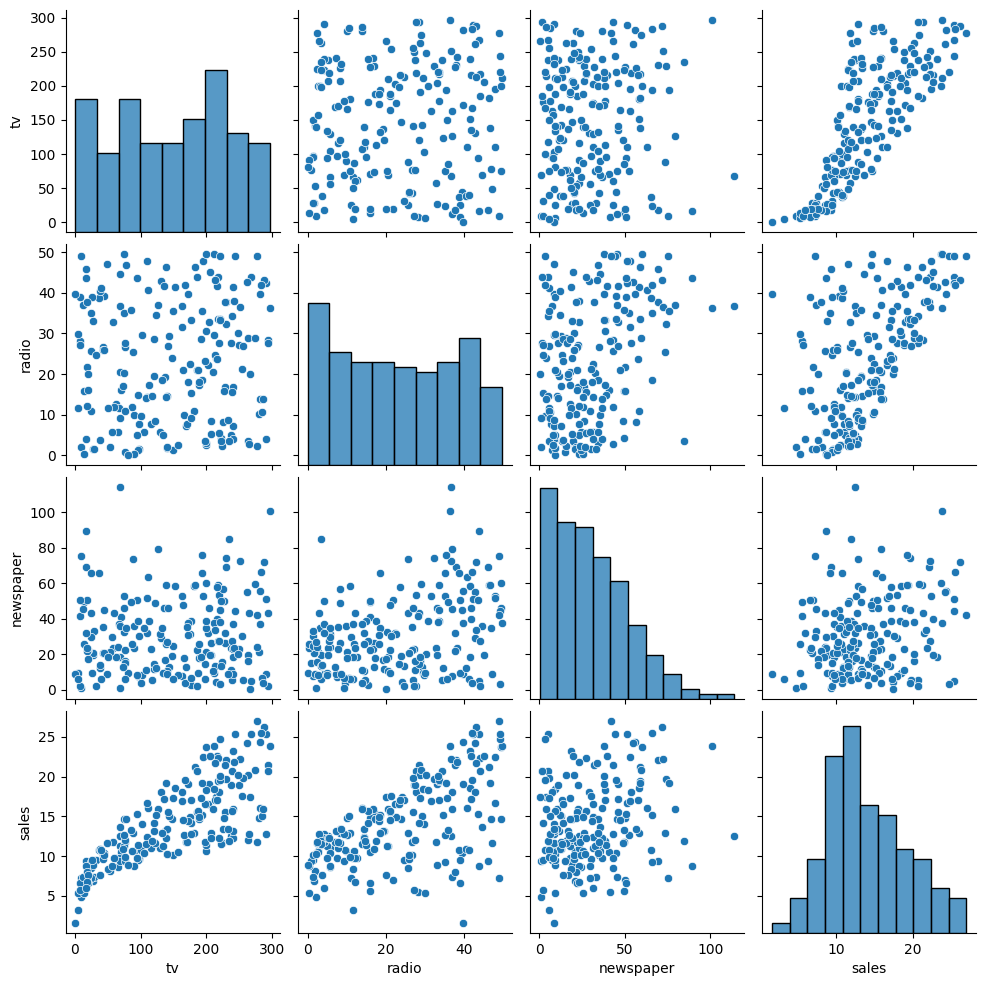

In [5]:
import seaborn as sns
sns.pairplot(advertising.drop('Index',axis=1))

<Axes: >

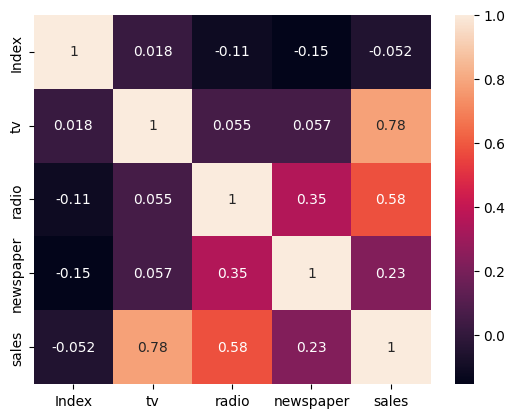

In [6]:
sns.heatmap(advertising.corr(), annot=True)

In [7]:
from scipy.stats import pearsonr

In [8]:
pearsonr(advertising['tv'],advertising['radio'])

PearsonRResult(statistic=0.05480866446583009, pvalue=0.440806063788431)

The correlation between `tv` and `radio` is not statistically significant.

In [10]:
pearsonr(advertising['newspaper'],advertising['radio'])

PearsonRResult(statistic=0.35410375076117534, pvalue=2.688835078719109e-07)

In [11]:
from statsmodels.formula.api import ols
ols("newspaper ~ radio", advertising).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,18.4700,2.689,6.870,0.000,13.168,23.772
radio,0.5194,0.097,5.328,0.000,0.327,0.712


In [12]:
ols("radio ~ newspaper", advertising).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,15.8883,1.699,9.354,0.000,12.539,19.238
newspaper,0.2414,0.045,5.328,0.000,0.152,0.331


<Axes: xlabel='radio', ylabel='newspaper'>

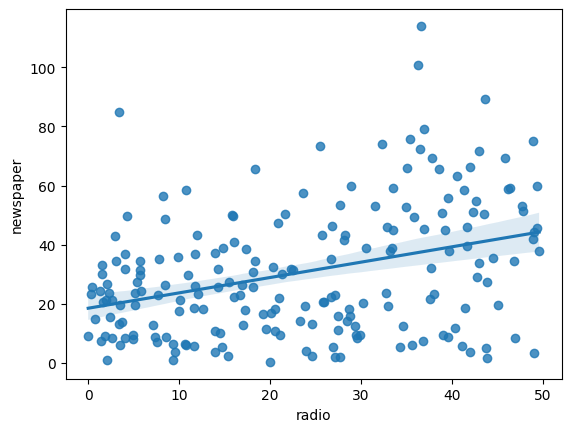

In [13]:
sns.regplot(x='radio', y='newspaper', data=advertising)

In [14]:
ols("sales ~ tv", advertising).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        19:48:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
tv             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='tv', ylabel='sales'>

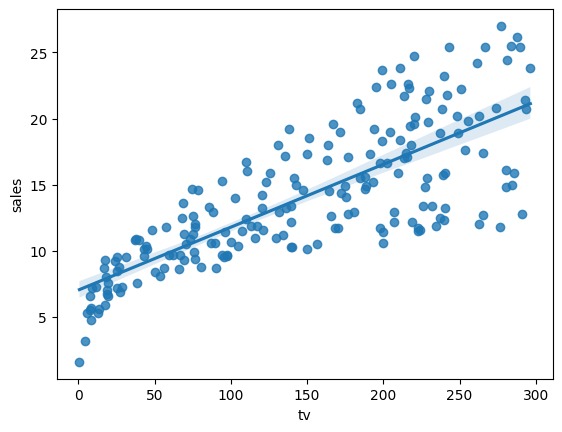

In [15]:
sns.regplot(x='tv', y='sales', data=advertising)

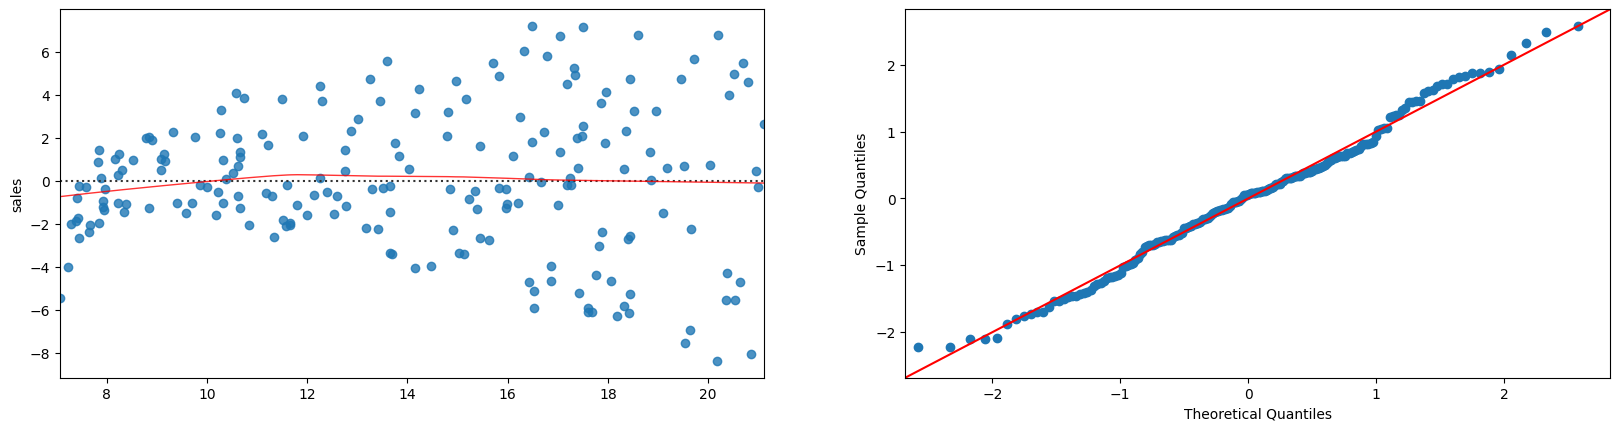

In [16]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
model=ols("sales ~ tv", advertising).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='sales', data=advertising.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-advertising.dropna()['sales'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

In [18]:
ols("sales ~ tv + radio", advertising).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           4.83e-98
Time:                        19:48:42   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
tv             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

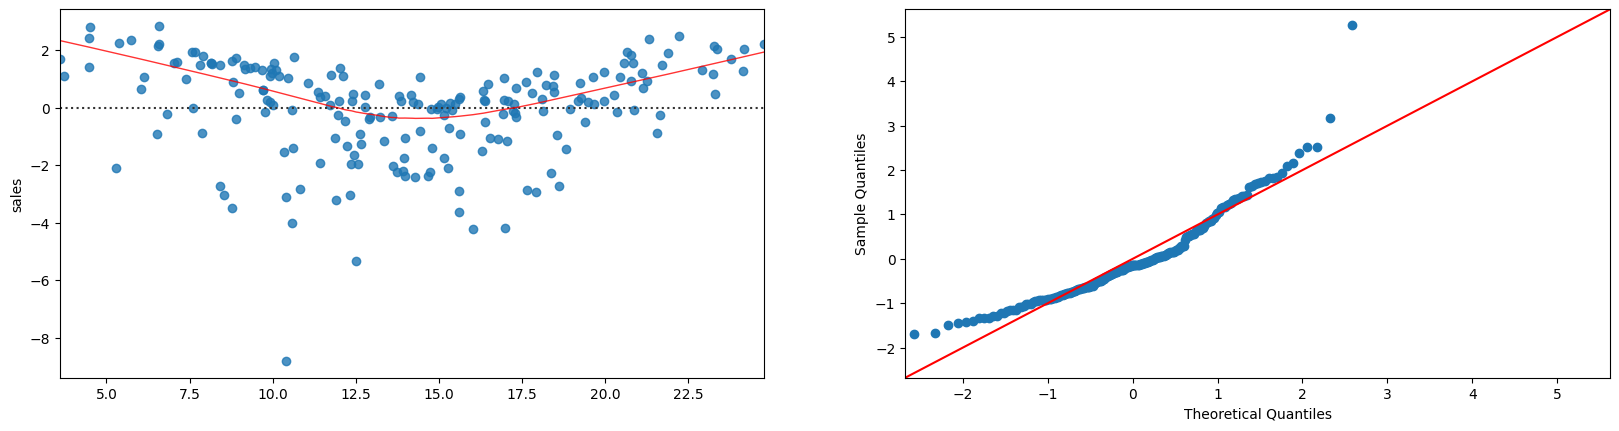

In [19]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
model=ols("sales ~ tv + radio", advertising).fit()

#otteniamo i valori predetti dal modello:
fitted = model.fittedvalues.fillna(0) #rimpiazzo eventuali NaN con zero

plt.figure(figsize=(20,22))
sns.residplot(x=fitted, y='sales', data=advertising.dropna(),lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, ax=plt.subplot(421))
sm.qqplot(fitted-advertising.dropna()['sales'], line='45',fit=True, ax=plt.subplot(422))
plt.show()

Let us add an interaction term:

In [20]:
ols("sales ~ tv   + radio + radio*tv", advertising).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          6.68e-146
Time:                        19:49:14   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
tv             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
radio:tv       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The regressor with interaction terms can be interpreted as follows:

$$sales = \beta_0 + \beta_1 tv + \beta_2 radio + \beta_3 radio \times tv$$
$$sales = \beta_0 + tv(\beta_1 + \beta_3 radio) + \beta_2 radio$$
$$sales = \beta_0 + \beta_1 tv + radio(\beta_2 + tv \beta_3)$$

# Linear Regression vs Mean Values

In [22]:
import numpy as np
x = np.random.normal(0,2,100)>0
y = np.random.normal(10,2,100) + 2*x
d= pd.DataFrame({
    'y': y,
    'x': x
})
d['x']=d['x'].astype(int)
d

,y,x
0,10.091945,0
1,8.620043,1
2,14.530024,0
3,16.894454,1
4,10.864606,1
...,...,...
95,8.241021,0
96,7.561387,0
97,6.688701,0
98,12.406282,1


In [23]:
d.describe()

,y,x
count,100.000000,100.000000
mean,11.124978,0.490000
std,2.509474,0.502418
min,5.701657,0.000000
25%,9.310256,0.000000
50%,10.770151,0.000000
75%,12.717417,1.000000
max,17.218798,1.000000


In [24]:
d[d['x']==0]['y'].mean()

10.18727989115969

In [25]:
d[d['x']==1]['y'].mean()

12.100950474439491

In [26]:
d[d['x']==0]['y'].mean() + 2.2391

12.42637989115969

In [27]:
ols('y ~ x', d).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     16.86
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           8.34e-05
Time:                        19:50:08   Log-Likelihood:                -225.46
No. Observations:                 100   AIC:                             454.9
Df Residuals:                      98   BIC:                             460.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1873      0.326     31.227      0.000       9.540      10.835
x              1.9137      0.466      4.106      0.000       0.989       2.839
==============================================================================
Omnibus:                        3.658   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.568
Skew:                           0.458   Prob(JB):                        0.168
Kurtosis:                       2.863   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='x', ylabel='y'>

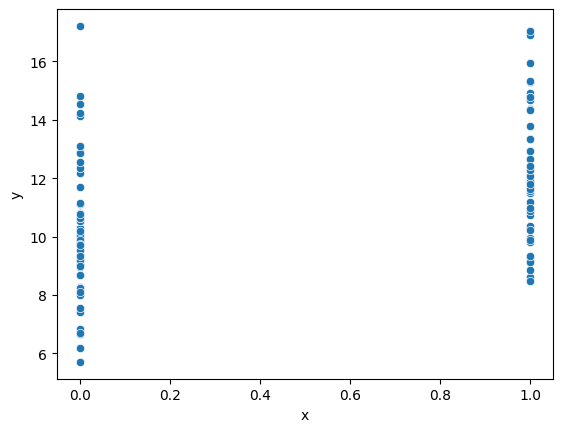

In [28]:
sns.scatterplot(x='x', y='y', data=d)

## Logistic regression

We will consider this dataset:

https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

In [29]:
data=pd.read_csv('heart_disease_uci.csv')

In [30]:
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [31]:
data['attack'] = (data['num']>0).astype(int)

In [32]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,attack
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000,1.000000


In [38]:
from statsmodels.formula.api import logit
logit("attack ~ sex", data).fit().summary()

Optimization terminated successfully.
         Current function value: 0.639394
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  920
Model:                          Logit   Df Residuals:                      918
Method:                           MLE   Df Model:                            1
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                 0.06992
Time:                        19:51:22   Log-Likelihood:                -588.24
converged:                       True   LL-Null:                       -632.47
Covariance Type:            nonrobust   LLR p-value:                 5.220e-21
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0578      0.164     -6.444      0.000      -1.380      -0.736
sex[T.Male]     1.5996      0.181      8.823      0.000       1.244       1.955
===============================================================================
"""

The coefficient of `sex[T.Male]` is telling us that males have a risk of heart attack $e^{1.5996} \approx 4.95$ times higher than females.

To compute a multiple logistic regressor, let us first extend the dataset with dummy variables:

In [49]:
data2 = pd.get_dummies(data.dropna(), columns=["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal"], drop_first=True)

We will use the non-forumla API:

In [64]:
from statsmodels.api import Logit
data2['Intercept']=1 # we need to add the intercept manually when using this API
Logit(data2['attack'], data2.drop(['dataset','attack','num','id'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.321016
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      280
Method:                           MLE   Df Model:                           18
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5352
Time:                        20:04:07   Log-Likelihood:                -95.984
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 5.920e-37
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                         -0.0137      0.025     -0.554      0.579      -0.062       0.035
trestbps                     0.0244      0.011      2.170      0.030       0.002       0.046
chol                         0.0042      0.004      1.064      0.287      -0.004       0.012
thalch                      -0.0180      0.011     -1.625      0.104      -0.040       0.004
oldpeak                      0.3610      0.231      1.566      0.117      -0.091       0.813
ca                           1.3099      0.280      4.682      0.000       0.762       1.858
sex_Male                     1.5500      0.531      2.920      0.003       0.510       2.590
cp_atypical angina          -0.8454      0.561     -1.508      0.132      -1.944       0.253
cp_non-anginal              -1.8501      0.501     -3.690      0.000      -2.833      -0.867
cp_typical angina           -2.1010      0.667     -3.151      0.002      -3.408      -0.794
fbs_True                    -0.5952      0.609     -0.977      0.329      -1.789       0.599
restecg_normal              -0.4695      0.384     -1.222      0.222      -1.222       0.283
restecg_st-t abnormality     0.3128      2.439      0.128      0.898      -4.467       5.092
exang_True                   0.7190      0.440      1.634      0.102      -0.143       1.581
slope_flat                   0.6474      0.851      0.761      0.447      -1.020       2.315
slope_upsloping             -0.5167      0.922     -0.560      0.575      -2.325       1.291
thal_normal                  0.0313      0.790      0.040      0.968      -1.517       1.579
thal_reversable defect       1.4329      0.775      1.850      0.064      -0.085       2.951
Intercept                   -2.8907      2.847     -1.015      0.310      -8.472       2.690
============================================================================================
"""

Let us proceed removing the variables with largest p-values wih backward elimination. We'll drop `thal_normal`:

In [68]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','thal_normal'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.321018
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      281
Method:                           MLE   Df Model:                           17
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5352
Time:                        20:05:21   Log-Likelihood:                -95.984
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 1.611e-37
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
age                         -0.0137      0.025     -0.555      0.579      -0.062       0.035
trestbps                     0.0244      0.011      2.171      0.030       0.002       0.046
chol                         0.0042      0.004      1.067      0.286      -0.004       0.012
thalch                      -0.0180      0.011     -1.636      0.102      -0.040       0.004
oldpeak                      0.3604      0.230      1.567      0.117      -0.090       0.811
ca                           1.3098      0.280      4.682      0.000       0.761       1.858
sex_Male                     1.5445      0.512      3.016      0.003       0.541       2.548
cp_atypical angina          -0.8443      0.560     -1.508      0.132      -1.942       0.253
cp_non-anginal              -1.8479      0.498     -3.709      0.000      -2.824      -0.871
cp_typical angina           -2.0968      0.658     -3.186      0.001      -3.387      -0.807
fbs_True                    -0.5979      0.605     -0.988      0.323      -1.784       0.589
restecg_normal              -0.4707      0.383     -1.229      0.219      -1.221       0.280
restecg_st-t abnormality     0.3147      2.439      0.129      0.897      -4.465       5.094
exang_True                   0.7186      0.440      1.634      0.102      -0.143       1.581
slope_flat                   0.6484      0.850      0.763      0.446      -1.018       2.314
slope_upsloping             -0.5133      0.919     -0.559      0.576      -2.314       1.287
thal_reversable defect       1.4068      0.405      3.471      0.001       0.612       2.201
Intercept                   -2.8676      2.786     -1.029      0.303      -8.329       2.593
============================================================================================
"""

Let us remove `restecg_st-t abnormality`:

In [69]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.321046
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           16
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5352
Time:                        20:05:33   Log-Likelihood:                -95.993
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 4.281e-38
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
age                       -0.0137      0.025     -0.553      0.581      -0.062       0.035
trestbps                   0.0245      0.011      2.187      0.029       0.003       0.046
chol                       0.0042      0.004      1.061      0.289      -0.004       0.012
thalch                    -0.0181      0.011     -1.650      0.099      -0.040       0.003
oldpeak                    0.3633      0.229      1.588      0.112      -0.085       0.812
ca                         1.3091      0.280      4.680      0.000       0.761       1.857
sex_Male                   1.5371      0.508      3.023      0.003       0.541       2.534
cp_atypical angina        -0.8440      0.560     -1.507      0.132      -1.942       0.254
cp_non-anginal            -1.8463      0.498     -3.705      0.000      -2.823      -0.870
cp_typical angina         -2.0996      0.658     -3.192      0.001      -3.389      -0.810
fbs_True                  -0.6002      0.605     -0.991      0.321      -1.787       0.586
restecg_normal            -0.4752      0.381     -1.246      0.213      -1.223       0.272
exang_True                 0.7188      0.440      1.634      0.102      -0.143       1.581
slope_flat                 0.6525      0.850      0.768      0.443      -1.014       2.319
slope_upsloping           -0.5079      0.918     -0.553      0.580      -2.308       1.292
thal_reversable defect     1.4075      0.405      3.474      0.001       0.614       2.202
Intercept                 -2.8552      2.784     -1.025      0.305      -8.312       2.602
==========================================================================================
"""

We now remove `age`:

In [70]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.321559
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      283
Method:                           MLE   Df Model:                           15
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5344
Time:                        20:05:46   Log-Likelihood:                -96.146
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 1.261e-38
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0228      0.011      2.126      0.034       0.002       0.044
chol                       0.0039      0.004      1.002      0.316      -0.004       0.011
thalch                    -0.0159      0.010     -1.561      0.119      -0.036       0.004
oldpeak                    0.3710      0.228      1.626      0.104      -0.076       0.818
ca                         1.2705      0.269      4.718      0.000       0.743       1.798
sex_Male                   1.5667      0.504      3.106      0.002       0.578       2.555
cp_atypical angina        -0.8593      0.560     -1.536      0.125      -1.956       0.237
cp_non-anginal            -1.8614      0.498     -3.738      0.000      -2.837      -0.885
cp_typical angina         -2.1148      0.656     -3.224      0.001      -3.400      -0.829
fbs_True                  -0.6053      0.602     -1.006      0.315      -1.785       0.574
restecg_normal            -0.4670      0.381     -1.227      0.220      -1.213       0.279
exang_True                 0.7299      0.438      1.666      0.096      -0.129       1.589
slope_flat                 0.6455      0.851      0.758      0.448      -1.023       2.314
slope_upsloping           -0.5038      0.920     -0.548      0.584      -2.307       1.299
thal_reversable defect     1.3990      0.404      3.466      0.001       0.608       2.190
Intercept                 -3.6527      2.381     -1.534      0.125      -8.319       1.013
==========================================================================================
"""

It's now the turn of `slope_upsloping`:

In [71]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age','slope_upsloping'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.322049
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      284
Method:                           MLE   Df Model:                           14
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5337
Time:                        20:05:54   Log-Likelihood:                -96.293
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 3.566e-39
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0227      0.011      2.116      0.034       0.002       0.044
chol                       0.0037      0.004      0.970      0.332      -0.004       0.011
thalch                    -0.0164      0.010     -1.619      0.105      -0.036       0.003
oldpeak                    0.4256      0.205      2.078      0.038       0.024       0.827
ca                         1.2458      0.264      4.715      0.000       0.728       1.764
sex_Male                   1.5501      0.502      3.087      0.002       0.566       2.534
cp_atypical angina        -0.8492      0.558     -1.521      0.128      -1.943       0.245
cp_non-anginal            -1.8661      0.498     -3.744      0.000      -2.843      -0.889
cp_typical angina         -2.1161      0.654     -3.235      0.001      -3.398      -0.834
fbs_True                  -0.5632      0.594     -0.947      0.343      -1.728       0.602
restecg_normal            -0.4814      0.379     -1.269      0.205      -1.225       0.262
exang_True                 0.7304      0.438      1.669      0.095      -0.127       1.588
slope_flat                 1.0485      0.429      2.442      0.015       0.207       1.890
thal_reversable defect     1.4014      0.404      3.472      0.001       0.610       2.193
Intercept                 -3.9750      2.302     -1.727      0.084      -8.487       0.537
==========================================================================================
"""

Let's remove `fbs_True`:

In [72]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age','slope_upsloping','fbs_True'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.323582
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      285
Method:                           MLE   Df Model:                           13
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5315
Time:                        20:06:06   Log-Likelihood:                -96.751
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 1.307e-39
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0210      0.011      1.998      0.046       0.000       0.042
chol                       0.0036      0.004      0.936      0.349      -0.004       0.011
thalch                    -0.0164      0.010     -1.628      0.103      -0.036       0.003
oldpeak                    0.4380      0.205      2.135      0.033       0.036       0.840
ca                         1.1942      0.256      4.664      0.000       0.692       1.696
sex_Male                   1.4928      0.498      3.000      0.003       0.518       2.468
cp_atypical angina        -0.8841      0.554     -1.596      0.110      -1.970       0.201
cp_non-anginal            -1.9746      0.489     -4.039      0.000      -2.933      -1.016
cp_typical angina         -2.1802      0.653     -3.340      0.001      -3.460      -0.901
restecg_normal            -0.4735      0.379     -1.250      0.211      -1.216       0.269
exang_True                 0.6861      0.435      1.578      0.115      -0.166       1.539
slope_flat                 1.0228      0.428      2.391      0.017       0.184       1.861
thal_reversable defect     1.4331      0.402      3.564      0.000       0.645       2.221
Intercept                 -3.6750      2.257     -1.628      0.104      -8.099       0.749
==========================================================================================
"""

Let's remove `chol`:

In [73]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age','slope_upsloping','fbs_True','chol'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.325012
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5294
Time:                        20:06:19   Log-Likelihood:                -97.179
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 4.481e-40
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0215      0.010      2.045      0.041       0.001       0.042
thalch                    -0.0152      0.010     -1.538      0.124      -0.035       0.004
oldpeak                    0.4460      0.205      2.174      0.030       0.044       0.848
ca                         1.1928      0.255      4.686      0.000       0.694       1.692
sex_Male                   1.3485      0.467      2.889      0.004       0.434       2.263
cp_atypical angina        -0.8627      0.551     -1.565      0.118      -1.943       0.218
cp_non-anginal            -1.9666      0.488     -4.026      0.000      -2.924      -1.009
cp_typical angina         -2.1905      0.651     -3.365      0.001      -3.466      -0.915
restecg_normal            -0.5380      0.371     -1.448      0.147      -1.266       0.190
exang_True                 0.6821      0.432      1.579      0.114      -0.164       1.529
slope_flat                 1.0435      0.427      2.446      0.014       0.207       1.880
thal_reversable defect     1.4706      0.402      3.659      0.000       0.683       2.258
Intercept                 -2.9396      2.092     -1.405      0.160      -7.039       1.160
==========================================================================================
"""

Let's remove `restecg_normal`:

In [74]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age','slope_upsloping','fbs_True','chol','restecg_normal'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.328559
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                           11
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5243
Time:                        20:06:47   Log-Likelihood:                -98.239
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 2.704e-40
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0225      0.010      2.196      0.028       0.002       0.043
thalch                    -0.0152      0.010     -1.530      0.126      -0.035       0.004
oldpeak                    0.4357      0.200      2.183      0.029       0.045       0.827
ca                         1.2152      0.253      4.806      0.000       0.720       1.711
sex_Male                   1.3796      0.466      2.961      0.003       0.466       2.293
cp_atypical angina        -0.8622      0.550     -1.567      0.117      -1.940       0.216
cp_non-anginal            -1.9589      0.485     -4.038      0.000      -2.910      -1.008
cp_typical angina         -2.1394      0.646     -3.313      0.001      -3.405      -0.874
exang_True                 0.6737      0.432      1.560      0.119      -0.173       1.520
slope_flat                 1.1014      0.422      2.608      0.009       0.274       1.929
thal_reversable defect     1.4078      0.395      3.567      0.000       0.634       2.181
Intercept                 -3.3894      2.056     -1.648      0.099      -7.420       0.641
==========================================================================================
"""

Let us now remove `exang_True`:

In [75]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age','slope_upsloping','fbs_True','chol','restecg_normal','exang_True'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.332571
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      288
Method:                           MLE   Df Model:                           10
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5185
Time:                        20:07:11   Log-Likelihood:                -99.439
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 1.791e-40
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0233      0.010      2.278      0.023       0.003       0.043
thalch                    -0.0180      0.010     -1.845      0.065      -0.037       0.001
oldpeak                    0.4647      0.197      2.354      0.019       0.078       0.852
ca                         1.2033      0.252      4.781      0.000       0.710       1.697
sex_Male                   1.3780      0.458      3.006      0.003       0.480       2.276
cp_atypical angina        -1.0592      0.537     -1.973      0.048      -2.111      -0.007
cp_non-anginal            -2.1451      0.472     -4.549      0.000      -3.069      -1.221
cp_typical angina         -2.3297      0.642     -3.626      0.000      -3.589      -1.071
slope_flat                 1.1436      0.420      2.724      0.006       0.321       1.966
thal_reversable defect     1.4692      0.391      3.758      0.000       0.703       2.235
Intercept                 -2.8221      2.011     -1.404      0.160      -6.763       1.119
==========================================================================================
"""

Let us now remove `thalch`:

In [76]:
Logit(data2['attack'], data2.drop(['dataset','attack','num','id','restecg_st-t abnormality','thal_normal','age','slope_upsloping','fbs_True','chol','restecg_normal','exang_True','thalch'],axis=1)).fit().summary()

Optimization terminated successfully.
         Current function value: 0.338536
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 attack   No. Observations:                  299
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                            9
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.5099
Time:                        20:07:42   Log-Likelihood:                -101.22
converged:                       True   LL-Null:                       -206.51
Covariance Type:            nonrobust   LLR p-value:                 1.996e-40
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
trestbps                   0.0220      0.010      2.145      0.032       0.002       0.042
oldpeak                    0.5145      0.194      2.659      0.008       0.135       0.894
ca                         1.2539      0.252      4.985      0.000       0.761       1.747
sex_Male                   1.3382      0.455      2.942      0.003       0.447       2.230
cp_atypical angina        -1.2521      0.521     -2.403      0.016      -2.274      -0.231
cp_non-anginal            -2.3023      0.464     -4.966      0.000      -3.211      -1.394
cp_typical angina         -2.5791      0.644     -4.004      0.000      -3.842      -1.317
slope_flat                 1.3792      0.397      3.470      0.001       0.600       2.158
thal_reversable defect     1.5143      0.388      3.907      0.000       0.755       2.274
Intercept                 -5.4495      1.485     -3.669      0.000      -8.361      -2.538
==========================================================================================
"""

Al p-values are now below the significance level $\alpha=0.05$. We can now proceed interpreting the result.